In [1]:
import pandas as pd
#encoding
from sklearn.preprocessing import LabelEncoder
#plot
import matplotlib.pyplot as plt
import seaborn as sns
#scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
#testing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

In [2]:
csv_file = pd.read_csv('/content/retail_store_sales.csv')
csv_file=csv_file.dropna(axis = 0, subset = ['Discount Applied'])
num_cols = csv_file.select_dtypes(include=['number']).columns
cat_cols = csv_file.select_dtypes(include=['object']).columns
csv_file[num_cols] = csv_file[num_cols].fillna(csv_file[num_cols].median())
csv_file[cat_cols] = csv_file[cat_cols].fillna('Unknown')

<ipython-input-2-f4798250e914>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  csv_file[cat_cols] = csv_file[cat_cols].fillna('Unknown')


In [3]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8376 entries, 0 to 12573
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    8376 non-null   object 
 1   Customer ID       8376 non-null   object 
 2   Category          8376 non-null   object 
 3   Item              8376 non-null   object 
 4   Price Per Unit    8376 non-null   float64
 5   Quantity          8376 non-null   float64
 6   Total Spent       8376 non-null   float64
 7   Payment Method    8376 non-null   object 
 8   Location          8376 non-null   object 
 9   Transaction Date  8376 non-null   object 
 10  Discount Applied  8376 non-null   bool   
dtypes: bool(1), float64(3), object(7)
memory usage: 728.0+ KB


In [4]:
#Encoding Categorical Values
enc = LabelEncoder()
csv_file = csv_file.drop(["Transaction ID","Customer ID","Transaction Date"],axis=1)
csv_file = csv_file.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
csv_file['Category_enc'] = enc.fit_transform(csv_file['Category'])
csv_file['Item_enc'] = enc.fit_transform(csv_file['Item'])
csv_file['Payment Method_enc'] = enc.fit_transform(csv_file['Payment Method'])
csv_file['Location_enc'] = enc.fit_transform(csv_file['Location'])
csv_file


,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Category_enc,Item_enc,Payment Method_enc,Location_enc
0,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,1,7,7,2,1
1,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,1,6,62,2,1
2,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,0,1,17,1,1
4,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,0,4,172,2,1
6,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,1,4,84,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12566,Milk Products,Item_1_MILK,5.0,4.0,20.0,Cash,Online,0,6,86,0,1
12567,Butchers,Item_3_BUT,8.0,5.0,40.0,Credit Card,In-store,0,1,145,1,0
12569,Patisserie,Item_1_PAT,5.0,9.0,45.0,Digital Wallet,In-store,0,7,87,2,0
12571,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,0,0,136,0,1


Exploratory Data Analysis

                 count        mean        std  min   25%    50%    75%    max
Price Per Unit  8376.0   23.437500  10.440181  5.0  15.5   23.0   32.0   41.0
Quantity        8376.0    5.577841   2.781930  1.0   3.0    6.0    8.0   10.0
Total Spent     8376.0  129.251671  92.311748  5.0  55.5  109.5  184.0  410.0



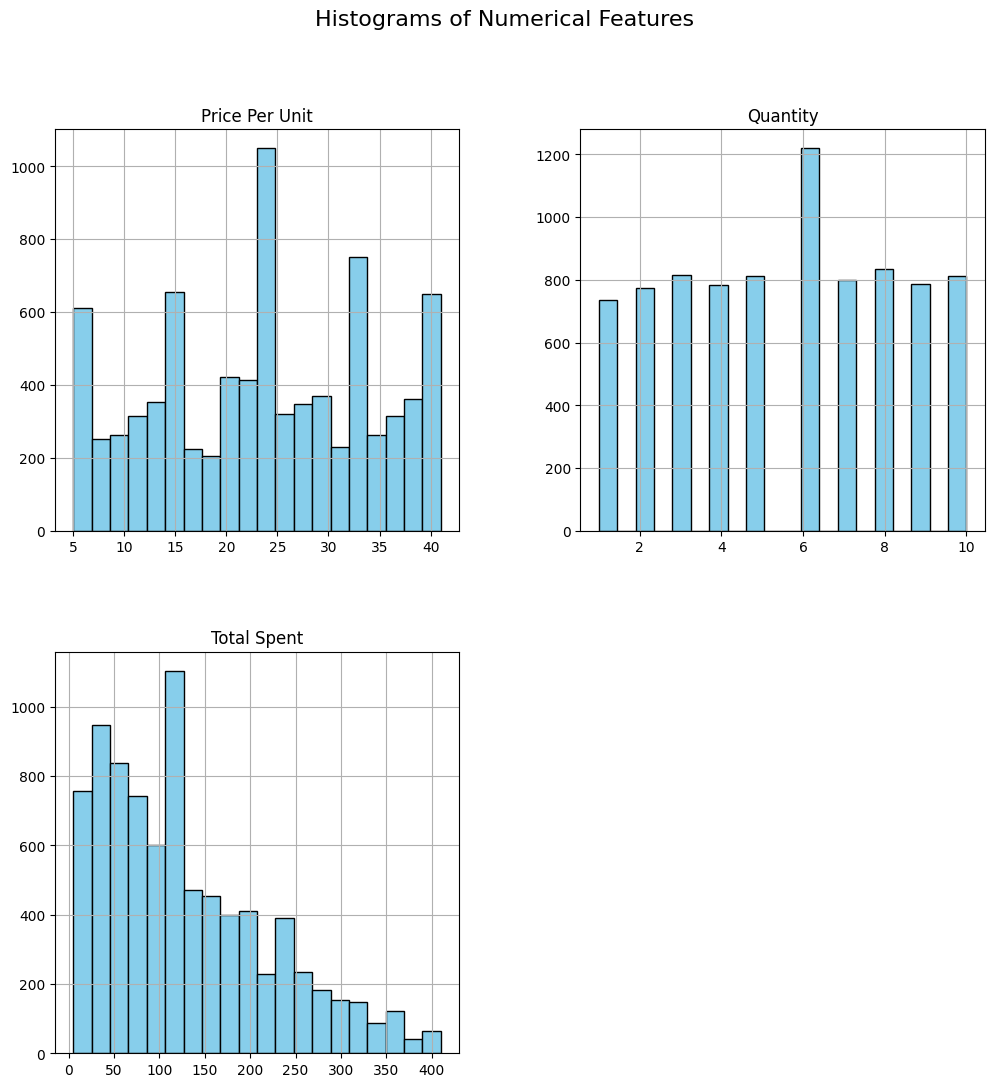

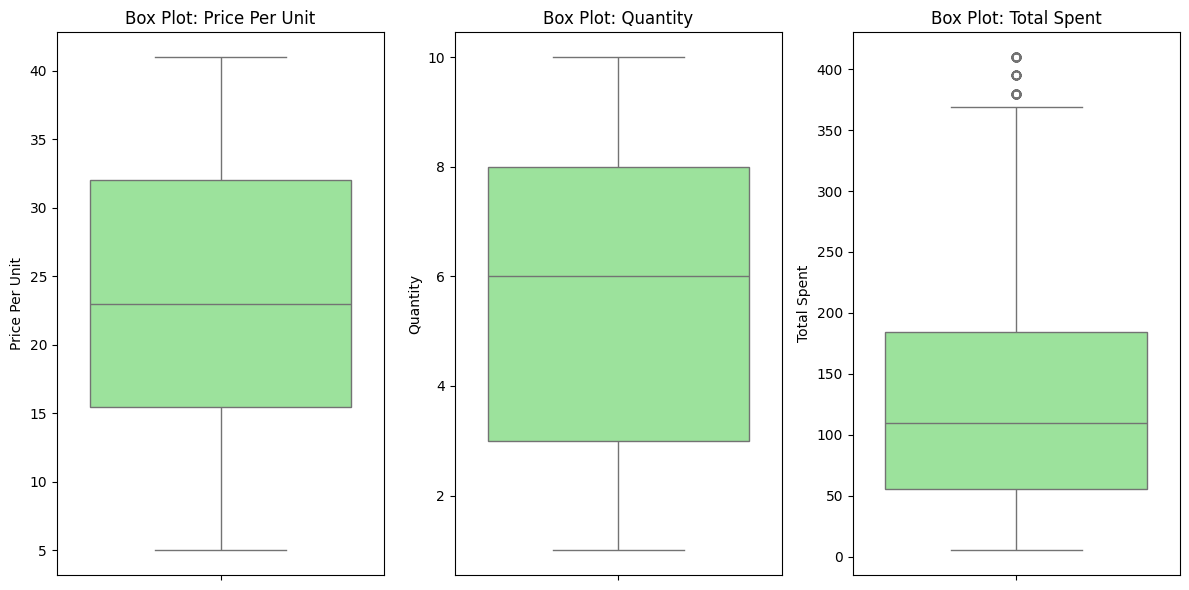

In [5]:
numerical_data = csv_file[num_cols]
print("Exploratory Data Analysis")
print()
print(numerical_data.describe().T)
print()
# Histogram
numerical_data.hist(figsize=(12, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()
# Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_data.columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=numerical_data[col], color='lightgreen')
    plt.title(f'Box Plot: {col}')
    plt.tight_layout()
plt.show()

Exploratory Data Analysis

Category            8
Item              201
Payment Method      3
Location            2
dtype: int64
Mode Values:
Category          Milk Products
Item                    Unknown
Payment Method             Cash
Location                 Online
Name: 0, dtype: object


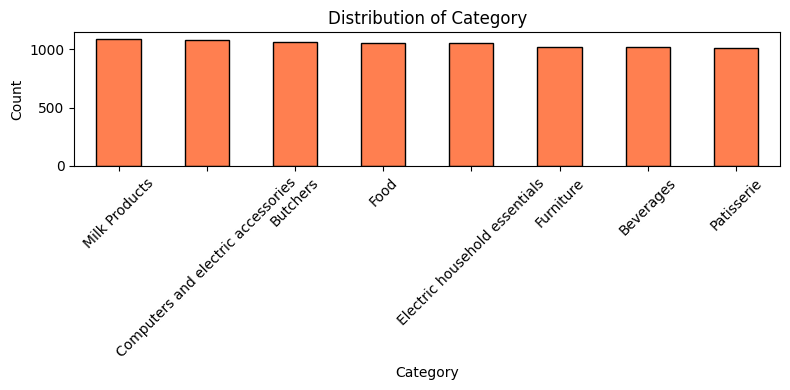

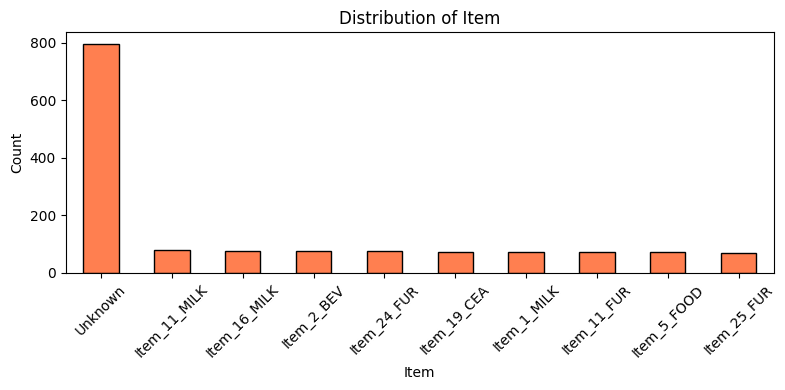

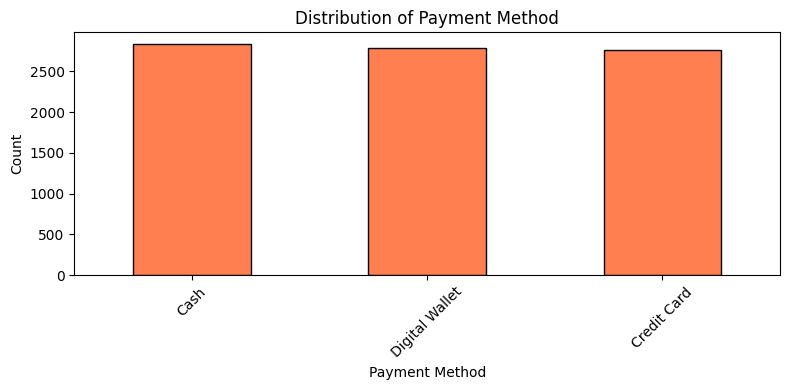

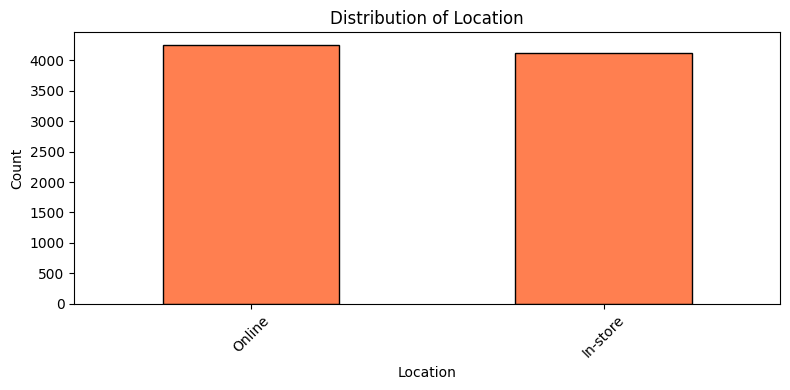

In [6]:
cat_cols = csv_file.select_dtypes(include=['object']).columns
categorical_data = csv_file[cat_cols]
print("Exploratory Data Analysis")
print()
print(categorical_data.nunique())

print("Mode Values:")
print(categorical_data.mode().iloc[0])

for col in categorical_data.columns:
    plt.figure(figsize=(8, 4))
    categorical_data[col].value_counts(dropna=False).head(10).plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
#correlation matrix
csv_file = csv_file.drop(['Category','Item','Payment Method','Location'],axis=1)
corr = csv_file.corr()
corr

,Price Per Unit,Quantity,Total Spent,Discount Applied,Category_enc,Item_enc,Payment Method_enc,Location_enc
Price Per Unit,1.000000,0.007482,0.593750,0.002932,-0.062643,-0.229769,-0.013848,-0.003118
Quantity,0.007482,1.000000,0.710665,-0.008061,-0.008338,0.000770,-0.013298,0.011898
Total Spent,0.593750,0.710665,1.000000,0.002666,-0.048263,-0.172482,-0.021035,0.005261
Discount Applied,0.002932,-0.008061,0.002666,1.000000,-0.001662,0.008269,-0.020057,0.003710
Category_enc,-0.062643,-0.008338,-0.048263,-0.001662,1.000000,0.048328,0.011695,-0.007309
Item_enc,-0.229769,0.000770,-0.172482,0.008269,0.048328,1.000000,0.026253,-0.000247
Payment Method_enc,-0.013848,-0.013298,-0.021035,-0.020057,0.011695,0.026253,1.000000,-0.008336
Location_enc,-0.003118,0.011898,0.005261,0.003710,-0.007309,-0.000247,-0.008336,1.000000


<Axes: >

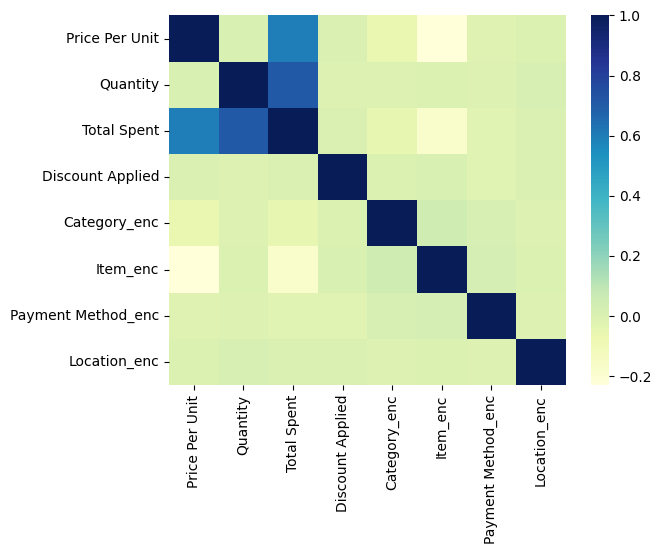

In [8]:
#heatmap
sns.heatmap(corr, cmap = 'YlGnBu')

In [9]:
#checking imbalance of target feature
csv_file['Discount Applied'].value_counts().sort_index()

,count
Discount Applied,
0,4157
1,4219


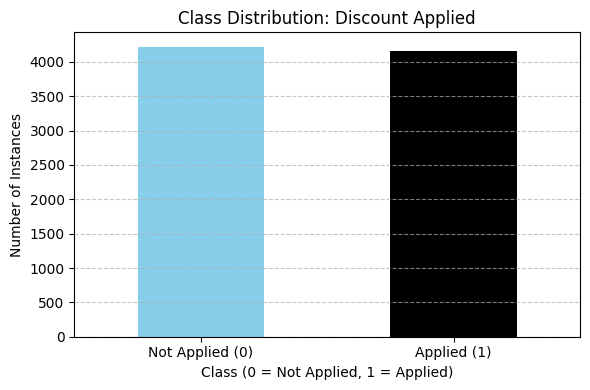

In [10]:
#output barchart
bar_chart = csv_file['Discount Applied'].value_counts()
# Plot
plt.figure(figsize=(6,4))
bar_chart.plot(kind='bar', color=['skyblue', 'black'])
plt.title('Class Distribution: Discount Applied')
plt.xlabel('Class (0 = Not Applied, 1 = Applied)')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Not Applied (0)', 'Applied (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
#scaling
rest_data = csv_file.drop(['Discount Applied'],axis =1)
target = csv_file['Discount Applied']
x_train, x_test, y_train, y_test = train_test_split(rest_data, target, test_size=0.3,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

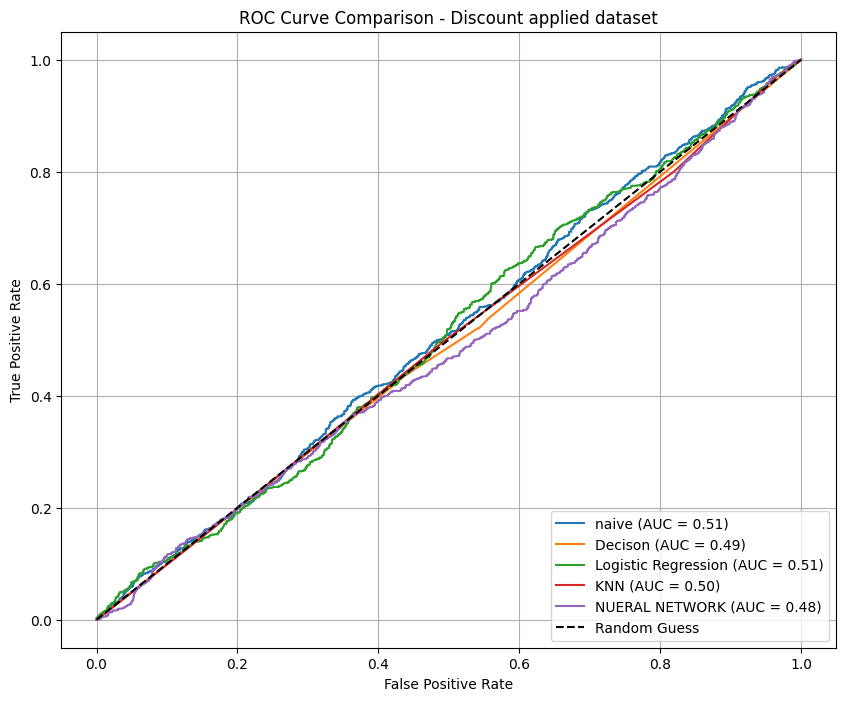

In [12]:
#model training
models = {
    "naive": GaussianNB(),
    "Decison" : tree.DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NUERAL NETWORK": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
}


plt.figure(figsize=(10, 8))
dic={}

for name, model in models.items():
  model.fit(x_train_scaled, y_train)
  y_pred = model.predict(x_test_scaled)
  y_probs = model.predict_proba(x_test_scaled)[:, 1]

  fpr, tpr, _ = roc_curve(y_test, y_probs)
  roc_auc = auc(fpr, tpr)
  dic[name]=roc_auc

  plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Discount applied dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

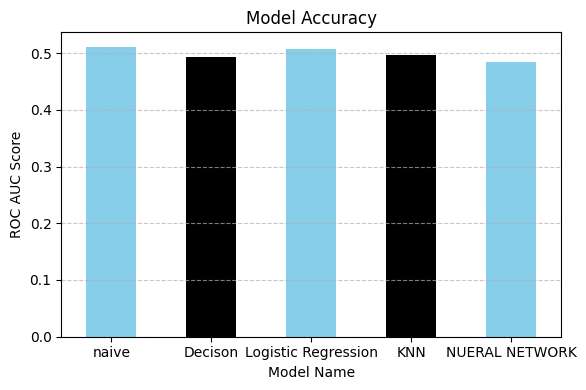

In [13]:
#Barchart of Roc Auc score
roc_auc_scores = pd.Series(dic, name="ROC AUC")

plt.figure(figsize=(6, 4))
roc_auc_scores.plot(kind='bar', color=['skyblue', 'black'])
plt.title('Model Accuracy')
plt.xlabel('Model Name')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

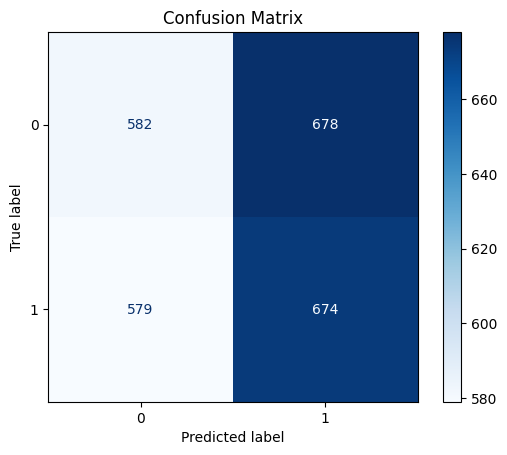

-----------------------------------------------------------------------
Neural Network:  0.4998010346199761
-----------------------------------------------------------------------
Neural Network: 
              precision    recall  f1-score   support

           1       0.50      0.46      0.48      1260
           0       0.50      0.54      0.52      1253

    accuracy                           0.50      2513
   macro avg       0.50      0.50      0.50      2513
weighted avg       0.50      0.50      0.50      2513

-----------------------------------------------------------------------


In [14]:
# NEURAL NETWORKconfusion matrix,precission,recall,f1 score

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train_scaled, y_train)
y_pred = mlp.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------------------------------------")
print("Neural Network: ", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------------------")
print("Neural Network: ")
print(classification_report(y_test, y_pred, target_names=["1","0"]))
print("-----------------------------------------------------------------------")

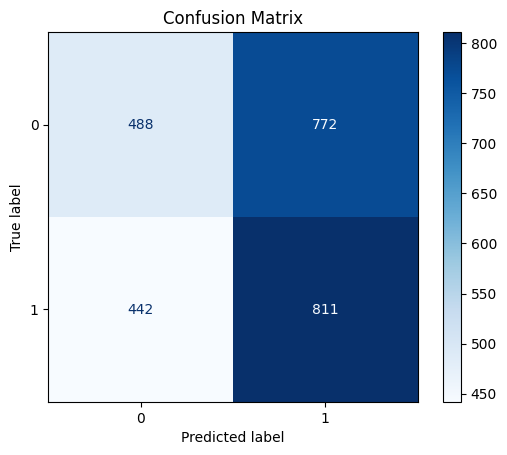

-----------------------------------------------------------------------
LogisticRegression: 0.5169120573020295
-----------------------------------------------------------------------
LogisticRegression:
              precision    recall  f1-score   support

           1       0.52      0.39      0.45      1260
           0       0.51      0.65      0.57      1253

    accuracy                           0.52      2513
   macro avg       0.52      0.52      0.51      2513
weighted avg       0.52      0.52      0.51      2513

-----------------------------------------------------------------------


In [15]:
#logstic regression confusion matrix,precission,recall,f1 score
lgr = LogisticRegression()
lgr.fit(x_train_scaled, y_train)
y_pred = lgr.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------------------------------------")
print("LogisticRegression:", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------------------")
print("LogisticRegression:")
print(classification_report(y_test, y_pred, target_names=["1","0"]))
print("-----------------------------------------------------------------------")

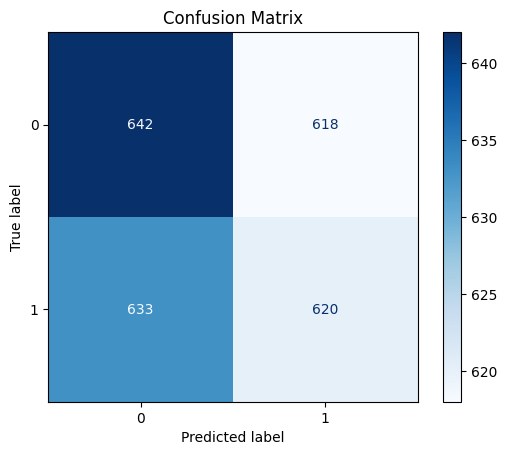

-----------------------------------------------------------------------
KNN Classifier:  0.5021886191802626
-----------------------------------------------------------------------
KNN Classifier: 
              precision    recall  f1-score   support

           1       0.50      0.51      0.51      1260
           0       0.50      0.49      0.50      1253

    accuracy                           0.50      2513
   macro avg       0.50      0.50      0.50      2513
weighted avg       0.50      0.50      0.50      2513

-----------------------------------------------------------------------


In [16]:
#KNN confusion matrix,precission,recall,f1 score
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print("-----------------------------------------------------------------------")
print("KNN Classifier: ", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------------------------")
print("KNN Classifier: ")
print(classification_report(y_test, y_pred, target_names=["1","0"]))
print("-----------------------------------------------------------------------")